In [1]:
import numpy as np
from scipy.optimize import fmin_ncg
import matplotlib.pyplot as plt

In [2]:
W = np.load('../rnndata/weight_hh_l0.npy')
b = np.load('../rnndata/bias_hh_l0.npy')
bi = np.load('../rnndata/bias_ih_l0.npy')

N = W.shape[0]

def f(x):
    r = np.tanh(W@x+b+bi)
    dx = -x+r
    return 0.5*(dx.T@dx)

## optimization functions / helpers
def f(x):
#     r = np.tanh(x)
#     dx = -x+W@r
    r = np.tanh(W@x+b+bi)
    dx = -x+r
    return 0.5*(dx.T@dx)

def grad_f(x):
#     r = np.tanh(x)
#     dx = -x+W@r
    r = np.tanh(W@x+b+bi)
    dx = -x+r
    d1 = (1-np.power(r,2)).reshape(N,1)
    h = ((W.T * (d1@np.ones([1,N]))) - np.identity(N))
    return h@dx

def hess_f(x):
#     r = np.tanh(x)
#     dx = -x+W@r
    r = np.tanh(W@x+b+bi)
    dx = -x+r
    d1 = (1-np.power(r,2)).reshape(N,1)
    h = ((W.T * (d1@np.ones([1,N]))) - np.identity(N))
    return h@h.T

## projection function with SVD
def PCA_project(X, modes, plot_SVs=True):
    # SVD of X
    U, s, VT = np.linalg.svd(X)
    
    # construct S matrix with S_vector -- there must be a better way to do this?
    S = np.zeros([U.shape[0],VT.shape[0]])
    for i in range(modes):
        S[i,i] = s[i]

#     print("shapes", X.shape, U.shape,S.shape,VT[:,:modes].shape, (U@S@VT[:,:modes]).shape)
    if plot_SVs:
        plt.plot(np.log(s))
        plt.show()
    return U@S@VT[:,:modes]

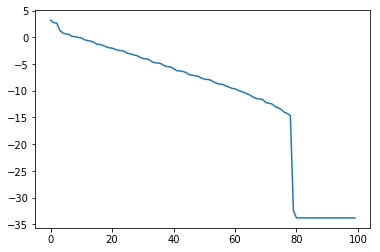

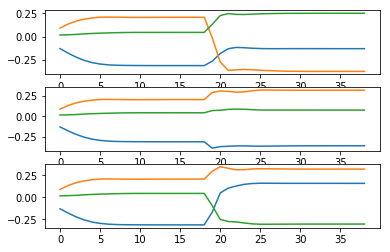

In [3]:
## get trajectories
traj0 = np.loadtxt(open("../rnndata/0perturb.csv", "rb"), delimiter=",", skiprows=1).T
traj1 = np.loadtxt(open("../rnndata/1perturb.csv", "rb"), delimiter=",", skiprows=1).T
traj2 = np.loadtxt(open("../rnndata/2perturb.csv", "rb"), delimiter=",", skiprows=1).T

datasets = [traj0.T,traj1.T,traj2.T]
n_dsets = len(datasets)
traj_c = np.concatenate(datasets).T

traj_projected = PCA_project(traj_c.T,3)

plt.figure(1)

traj_projected_split = np.split(traj_projected,n_dsets)
for i in range(len(traj_projected_split)):
    plt.subplot(311+i)
    for traj in traj_projected_split[i].T:
        plt.plot(np.arange(traj.shape[0]), traj)
    
plt.show()

In [4]:
## use trajectories to find nearby fixed pts
xs = traj_c
xopts = []
for x in xs.T:
    xopt = fmin_ncg(f, x, grad_f, fhess=hess_f, avextol=1e-10)
    xopts.append(xopt)
    
xopts = np.array(xopts)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 37
         Hessian evaluations: 17
         Current function value: 0.021818
         Iterations: 3
         Function evaluations: 43
         Gradient evaluations: 34
         Hessian evaluations: 4
         Current function value: 0.010717
         Iterations: 5
         Function evaluations: 28
         Gradient evaluations: 21
         Hessian evaluations: 6
         Current function value: 0.004821
         Iterations: 4
         Function evaluations: 27
         Gradient evaluations: 19
         Hessian evaluations: 5
         Current function value: 0.002041
         Iterations: 3
         Function evaluations: 45
         Gradient evaluations: 37
         Hessian evaluations: 4
         Current function value: 0.000438
         Iterations: 3
         Function evaluations: 42
         Gradient evaluations: 34
  

         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 86
         Gradient evaluations: 83
         Hessian evaluations: 9
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 47
         Gradient evaluations: 41
         Hessian evaluations: 6
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 47
         Gradient evaluations: 37
         Hessian evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 37
         Hessian evaluations: 17
         Current function value: 0.021818
         Iterations: 3
         Function evaluations: 43
         Gradient evaluations: 34
         Hessian evaluations: 4
         Current function value: 0.010717
         Iterations: 5
         Function evaluations: 28
         Gradient evaluations: 21
  

         Current function value: 0.000000
         Iterations: 6
         Function evaluations: 46
         Gradient evaluations: 40
         Hessian evaluations: 7
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 53
         Gradient evaluations: 44
         Hessian evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 37
         Hessian evaluations: 17
         Current function value: 0.021818
         Iterations: 3
         Function evaluations: 43
         Gradient evaluations: 34
         Hessian evaluations: 4
         Current function value: 0.010717
         Iterations: 5
         Function evaluations: 28
         Gradient evaluations: 21
         Hessian evaluations: 6
         Current function value: 0.004821
         Iterations: 4
         Function evaluations: 27
         Gradient evaluations: 19
  

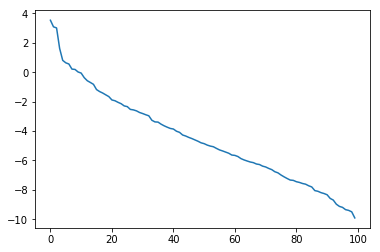

shapes: (117, 3) (117, 3)


In [5]:
## concatenate trajectories and fixed points, project into 3D, and separate
divide = traj_c.shape[1]
concat=np.hstack([traj_c,xopts.T])
proj_concat = PCA_project(concat.T,3)
traj_projected = proj_concat[:divide]
traj_projected_split = np.split(traj_projected,3)
xopts_projected = proj_concat[divide:]
print('shapes:', traj_projected.shape, xopts_projected.shape)

## alternately, SVD traj_c and project fixed points accordingly. ## not sure this is correct.
# U, s, VT = np.linalg.svd(traj_c)
# modes = 3

# S = np.zeros([U.shape[0],VT.shape[0]])
# for i in range(modes):
#     S[i,i] = s[i]

# xopts_projected2 = (U.T[:3,:]@xopts.T).T/s[:3]

In [6]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import random

r = lambda: random.randint(0,255)
color = '#%02X%02X%02X' % (r(),r(),r())

# fixed points projected by U of trajectories
x = pd.Series(xopts_projected[:,0])
y = pd.Series(xopts_projected[:,1])
z = pd.Series(xopts_projected[:,2])

fps = go.Scatter3d(x=x, y=y, z=z,
    mode='markers',
    marker=dict(
        size=12,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.3
    )
)

data = [fps]

for i in range(len(traj_projected_split)):
    traj = traj_projected_split[i]
    
    color = '#%02X%02X%02X' % (r(),r(),r())
    x = pd.Series(traj[:,0])
    y = pd.Series(traj[:,1])
    z = pd.Series(traj[:,2])

    trace = go.Scatter3d(x=x, y=y, z=z,
        marker=dict(
            size=4,
            color=color,
            colorscale='Viridis',
        ),
        line=dict(
            color=color,
            width=1
        )
    )
    data.append(trace)

layout = dict(
    width=800,
    height=700,
    autosize=True,
    title='3 bit flip flop',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=-1.7428,
                y=1.0707,
                z=0.7100,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='3bit_fps_plz', height=700, validate=False)

-1.0
-1.0
-1.0


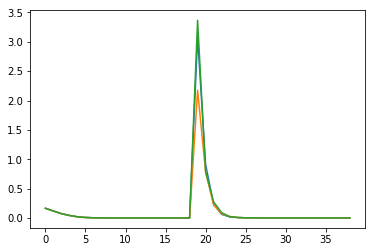

In [7]:
## plot (q) energy of trajectories
trajs = np.array([f(i) for i in traj_c.T])
for i in np.split(trajs,3):
    print(np.sign(i[-1]-i[-4]))
    plt.plot(i)
    
plt.show()

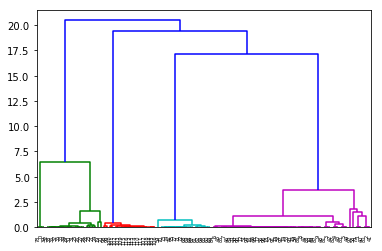

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# number of clusters
k = 7

# computes the distance between points, merges closest based on the method
Z=linkage(xopts, method='ward');

# draws the resulting dendrogram from the clustering done by linkage
dendrogram(Z);
plt.show()
# gives the cluster that each original point belongs to.
idx = fcluster(Z,k,'maxclust');

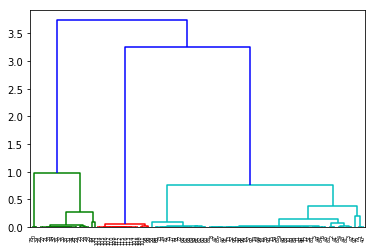

In [9]:
Z=linkage(xopts_projected, method='ward');

# draws the resulting dendrogram from the clustering done by linkage
dendrogram(Z);
plt.show()